In [1]:
#https://anaconda.org/conda-forge/node2vec
#https://github.com/eliorc/node2vec/blob/master/README.md
#установить через конду или pip смотря что там у вас стоит

# WSBM and Node2Vec representation

In [1]:
import networkx as nx
from node2vec import Node2Vec
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sbm_utils import generate_sbm_adj, generate_wsbm_adj, random_permute

In [38]:
# Create a graph
graph = nx.fast_gnp_random_graph(n=50, p=0.5)

### Playing with networkx

In [39]:
''.join([str(el) for el in list(graph.edges())[:10]])

'(0, 1)(0, 4)(0, 5)(0, 7)(0, 11)(0, 12)(0, 14)(0, 15)(0, 16)(0, 17)'

In [28]:
np.random.randint(100, size = 10)

array([ 7,  0, 88, 49,  8, 67, 77, 76, 34, 77])

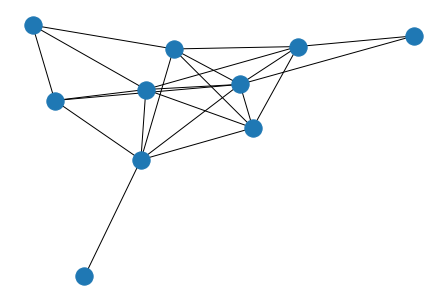

In [40]:
nx.draw(graph.subgraph(list(graph.nodes())[:10]))

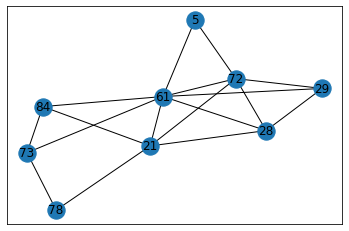

In [30]:
nx.draw_networkx(graph.subgraph(np.random.randint(100, size = 10)))

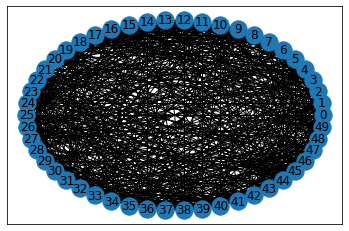

In [45]:
nx.draw_networkx(graph, pos=nx.circular_layout(graph))

## SBM

### SBM

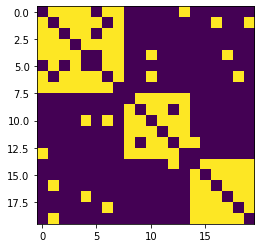

In [4]:
Adj = generate_sbm_adj(20,[0.4,0.3, 0.3],theta_in = 0.9,theta_out = 0.1)
plt.imshow(Adj)

In [5]:
graph = nx.from_numpy_matrix(Adj)

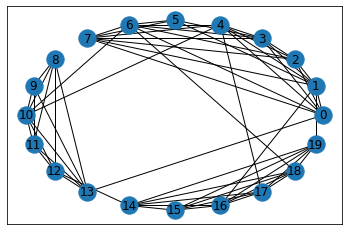

In [6]:
nx.draw_networkx(graph, pos=nx.circular_layout(graph))

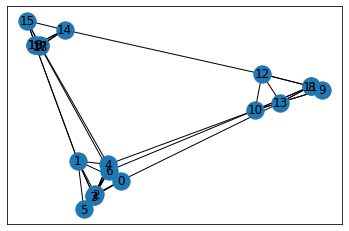

In [7]:
nx.draw_networkx(graph, pos=nx.spectral_layout(graph))

In [8]:
node2vec = Node2Vec(graph, dimensions=20, walk_length=15, p=1,q=1, num_walks=200, workers=4)

Computing transition probabilities: 100%|██████████| 20/20 [00:00<00:00, 5330.84it/s]


In [9]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [10]:
model.wv.most_similar('14')

[('15', 0.9323715567588806),
 ('17', 0.9072428345680237),
 ('16', 0.8998849391937256),
 ('18', 0.8895735144615173),
 ('19', 0.8778547644615173),
 ('12', 0.5038034915924072),
 ('8', 0.1618672013282776),
 ('11', 0.15750883519649506),
 ('9', 0.051087744534015656),
 ('10', 0.03445032238960266)]

In [11]:
model.wv.most_similar('0')

[('4', 0.963984489440918),
 ('7', 0.9579507112503052),
 ('6', 0.9552161693572998),
 ('2', 0.9548243880271912),
 ('3', 0.9498652219772339),
 ('5', 0.9159559607505798),
 ('1', 0.7675360441207886),
 ('13', 0.27127665281295776),
 ('10', 0.26317498087882996),
 ('9', 0.199976846575737)]

 В общем с обычной блочной моделью работает очень хорошо. 

### WSBM

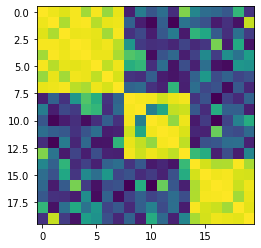

In [69]:
#node2vec.walks[100]
wAdj = generate_wsbm_adj(20,[0.4,0.3,0.3],theta_in = 3,theta_out = -1)
plt.imshow(wAdj)

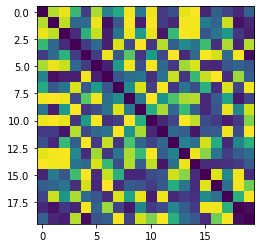

In [70]:
order, permuted = random_permute(wAdj)
plt.imshow(permuted)

In [71]:
order

array([ 2,  1,  5, 14,  8,  6, 12, 15,  4, 18,  3, 17,  9,  0,  7, 13, 11,
       19, 10, 16])

In [72]:
np.argsort(order)

array([13,  1,  0, 10,  8,  2,  5, 14,  4, 12, 18, 16,  6, 15,  3,  7, 19,
       11,  9, 17])

In [73]:
graph = nx.from_numpy_matrix(permuted)

In [74]:
graph[0][1]['weight']

0.8801642643673543

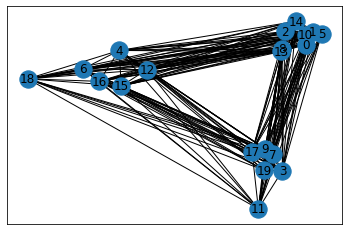

In [75]:
nx.draw_networkx(graph, pos=nx.spectral_layout(graph))

In [49]:
node2vec = Node2Vec(graph, dimensions=25, walk_length=15, p=0.5,q=1, num_walks=200, workers=4)

Computing transition probabilities: 100%|██████████| 20/20 [00:00<00:00, 884.64it/s]


In [50]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [58]:
neworder

array([ 3, 12,  9,  5, 10,  7, 14,  8,  1,  0, 16, 15, 11,  2, 17,  6, 13,
        4, 18, 19])

In [51]:
model.wv.most_similar('3',  topn=10)

[('8', 0.9976063966751099),
 ('5', 0.9971903562545776),
 ('9', 0.9964567422866821),
 ('14', 0.9948505163192749),
 ('7', 0.9943048357963562),
 ('12', 0.9923135042190552),
 ('10', 0.9906142354011536),
 ('15', 0.9328808784484863),
 ('0', 0.9187268614768982),
 ('2', 0.9139891862869263)]

In [34]:
model.wv.most_similar('13', topn=10)

[('18', 0.9983430504798889),
 ('6', 0.9980395436286926),
 ('17', 0.9973024129867554),
 ('4', 0.9964023232460022),
 ('19', 0.9949058294296265),
 ('16', 0.9741629958152771),
 ('15', 0.9720110297203064),
 ('0', 0.9626325368881226),
 ('14', 0.9613239765167236),
 ('1', 0.959923505783081)]

In [63]:
model.wv.most_similar('19', topn=10)

[('4', 0.9983665943145752),
 ('13', 0.9977275729179382),
 ('17', 0.9973195195198059),
 ('18', 0.997217059135437),
 ('6', 0.9926418662071228),
 ('16', 0.9516230225563049),
 ('0', 0.9280972480773926),
 ('1', 0.9280968904495239),
 ('15', 0.8978024125099182),
 ('11', 0.8889946341514587)]

In [61]:
from scipy.spatial.distance import cosine

In [65]:
embeddings = model.wv.vectors

In [54]:
#[f"Sim between 0 node to {k}: {1-cosine(embeddings[0,:],embeddings[k,:])}" for k in range(1,20)]

In [55]:
neworder

array([ 3, 12,  9,  5, 10,  7, 14,  8,  1,  0, 16, 15, 11,  2, 17,  6, 13,
        4, 18, 19])

In [66]:
node = 19
[f"Sim between {node} node to {k}: {1-cosine(embeddings[node,:],embeddings[k,:])}" for k in range(0,20)]

['Sim between 19 node to 0: 0.9157911539077759',
 'Sim between 19 node to 1: 0.7314431071281433',
 'Sim between 19 node to 2: 0.7847748398780823',
 'Sim between 19 node to 3: 0.8107119798660278',
 'Sim between 19 node to 4: 0.8023436069488525',
 'Sim between 19 node to 5: 0.8012129068374634',
 'Sim between 19 node to 6: 0.7776618599891663',
 'Sim between 19 node to 7: 0.7997757196426392',
 'Sim between 19 node to 8: 0.9925416707992554',
 'Sim between 19 node to 9: 0.9969567656517029',
 'Sim between 19 node to 10: 0.7497936487197876',
 'Sim between 19 node to 11: 0.9906561374664307',
 'Sim between 19 node to 12: 0.9940782785415649',
 'Sim between 19 node to 13: 0.8852259516716003',
 'Sim between 19 node to 14: 0.8466796875',
 'Sim between 19 node to 15: 0.992641806602478',
 'Sim between 19 node to 16: 0.8855239152908325',
 'Sim between 19 node to 17: 0.8383238315582275',
 'Sim between 19 node to 18: 0.8121514320373535',
 'Sim between 19 node to 19: 1.0']

Вообще хорошо бы посмотреть что будет происходить когда будут вложенные кластеры. Скорее всего будет просто сложнее разделить. Но пока не надо

In [36]:
def normalized_cut_minimization(Adj):
    '''
    Implement the normalized cut minimizaton algorithm we derived in the last
    homework here
    '''
    dd = np.sum(Adj, axis = 0)
    D = np.diag(dd)
    ##########################################################################
    #TODO: Your code here
    L = D-Adj
    Dinvsqrt = np.diag(dd**(-1/2))
    L_norm = np.matmul(Dinvsqrt,np.matmul(L, Dinvsqrt))
    w, v = linalg.eigh(L_norm)
    return (np.where(v[:,1]>=0)[0],np.where(v[:,1]<0)[0]), w,v 

In [37]:
(c1,c2),v,w = normalized_cut_minimization(permuted)

In [67]:
c1

array([ 0,  1,  2,  4,  6, 11, 13, 15, 16, 17, 18, 19])

In [39]:
neworder = np.argsort(order)

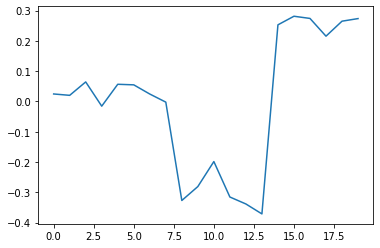

In [42]:
plt.plot(w[neworder,2])

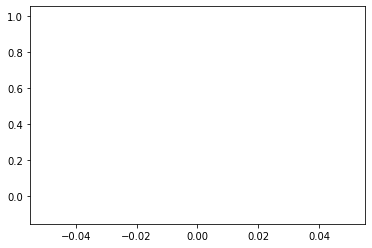

In [85]:
plt.plot(nx.normalized_laplacian_matrix(graph).todense()[1,:])